## Analysis of Grade R Early Learning Outcome Measure (ELOM) Data in South Africa for 2019

### Goolam Bangie, Uwais Suliman, Iman Ahmed, Jonah Alter

#### Section of Contents:
1. Introduction
* Research Questions
* Methodology
* Data Description
* Data Wrangling
* Exploratory Analysis
* Model Fitting
* Hypothesis Testing
* Interpretation of Results
* Conclusion

#### Introduction 

Childhood experiences during the first 6 years of life determine the extent to which key foundational skills are developed that are necessary for entering school. Such experiences include interactions that happen at home with parents or caregivers as well as any participation in an early learning programme.  To establish whether children are being exposed to early life experiences which build their intellect and form the foundations for success when they’re older, we need to be able to measure child outcomes. For these outcomes to be fairly assessed they need to be measured at a population level and across multiple developmental domains. It is also necessary to evaluate the efficacy of children attending early learning programmes. 

This study collected data on South African children between the ages of 49-72 months from various socio-economic backgrounds, who have been exposed to Grade R education. These terms of their performance, social and emotional functioning, and orientation to specific tasks were directly assessed to arrive at the ELOM score of each learner.

ELOM is an age-normed, standardized instrument that is calculated based off of 23 indicators measuring a learner's early development in five domains:

- Gross Motor Development
- Fine Motor Coordination and Visual Motor Integration
- Emergent Numeracy and Mathematics
- Cognition and Executive Functioning
- Emergent Literacy and Language

These indicators each carry a certain weighting in their contribution to the total ELOM score. The ELOM score is then used to monitor trends over time in terms of the key development of each learner.


The motivation behind this study is determining whether children are developmentally on track for their age and simultaneously this then identifies areas for improvement, within various developmental domains. 

The ELOM tool also assesses the efficacy of Early Childhood Development (ECD) programmes in preparing children for entry into school.


Previous studies have been conducted on this topic, which can be found at: https://www.datafirst.uct.ac.za/dataportal/index.php/catalog/863/download/11890

The findings of the study show that other factors that contributed to improvement in ELOM scores included:
- Practitioners’ reported support from their organisations 
- The child’s baseline ELOM scores (those with lower baseline scores made the greatest gains).

### Research Questions 

Our aim in this research is to investigate how various factors influence ELOM score and to what extent they do.

The first 3 questions will be investigated using the 2019 ELOM dataset. 

 ##### 1 - Does the socio-economic background of a child influence their ELOM score and, if so, to what extent?
Here we aim to investigate the relationships between various socio-economic factors and ELOM score. 


 ##### 2 - In conjunction with the socio-economic background of a child, do the behavioural tendencies of the child have an influence on the ELOM score?
This question investigates the relationship between behavioural tendencies of a child and their ELOM score in the presence of socio-economic factors. 


 ##### 3 - In the absence of the socio-economic factors, to what extent do the behavioural tendencies of a child influence ELOM score and whether or not the child is at risk? 
 We aim to determine how heavily ELOM score is influenced by behavioural tendencies and whether or not a child is at risk. The risk factor describes how far behind a child is in terms of standard development, relative to other children within their age group. 
 
 ##### 4 - Considering the 2016 dataset, to what extent do the socio-economic factors influence ELOM score and how does this compare to 2019?
 We will examine the degree to which the influence of socio-economic factors on ELOM score changed from 2016 to 2019. 

#### Methodology

Data wrangling will be conducted on both datasets in order to ensure that our data is in a format which is easy to work with.

We will first look at our datasets to determine which variables are categorized as socio-economic factors and behavioural tendencies, respectively, as these pertain to our above questions. 

Thereafter, we will make use of coefficient matrices and other subplots of the data in order arrive at initial observations regarding the strength of the relationships between these variables and ELOM score, which is our dependent variable. 

From the exploratory analyses above, we will then create dataframes that contain variables specific to the above 4 questions. The data within these dataframes will then be split into training and testing datasets.

We will then use these datasets to perform Least Squares Regression afterwhich we will compare the regression coefficients to one another, to determine whether the variables and their influence on ELOM score are statistically correct. 

### Data Description

_Data was retrieved from UCT DataFirst on the 24th of March 2021.<br>
2019 ELOM Score - https://www.datafirst.uct.ac.za/dataportal/index.php/catalog/819/study-description <br>
2016 ELOM Score - https://www.datafirst.uct.ac.za/dataportal/index.php/catalog/627/study-description_

The data relates to children between the ages of 49-72 months in selected schools around South Africa. The dataset looks at the ELOM score of various children in the different schools together with the tests that contribute to the total ELOM score. Additionally, it looks at their behavioral tendencies, home environment, social and economic factors and the mental state of the children who took part in the research. 

The data was collected from schools in the Western Cape, KwaZulu Natal, Eastern Cape and North West Provinces of South Africa on the 25 July 2020. This was done using the Early Learning Outcomes Measure (ELOM) tool which includes the following components: ELOM Direct Assessment Kit, ELOM Direct Assessment Kit list, ELOM Direct Assessment Manual, ELOM Technical Manual, ELOM Scoring Sheet, Open source online protocol for tablet/phone-based scoring and data capture, ELOM Teacher Assessment of the Child.

In order to measure the quality of the data we need to make sure it conforms with the 5 aspects of data quality namely Validity, Accuracy, Completeness, Consistency, Uniformity
* Validity: The data conforms to the Principles of Data as outlined by Wickam (https://vita.had.co.nz/papers/tidy-data.pdf). The data is in a standard format as each observation is a row, each feature is a column and each entry is a cell.  
* Accuracy: The data was collected from actual Grade R learners and is therefore accurate and conforms to the real world.
* Completeness: The data does contain a few nulls in the hfa (height for age z-score) column, which could impact our outcomes for the specific questions that we mentioned above. This will however be resolved in the data wrangling process.There are no duplicate entries present.
* Consistency: Upon looking at the data, data in fields and columns respectively appear to be in logical agreement.
* Uniformity: By looking at the dataset, we are able to confirm that the same units are used across a given field. For example, all heights in the ‘Height’ column are given in cm and all ages in the ‘Age’ column are given in months.


In [1]:
# Initialisation Cell
import numpy as np
import pandas as pd
import seaborn as sns
import numpy.testing as npt
import pandas.testing as pdt
from IPython.display import display_html,display, Markdown
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True, precision=7)

#### Importing data

In [2]:
df = pd.read_stata('elom.dta')
df2019 = df.copy() # make a copy of the dataframe which will be manipulated
df2 = pd.read_stata('elom2016.dta')
df2016 = df2.copy() # make a copy of the dataframe which will be manipulated
display(df)

,csid,Province,SchoolID,RuralOrUrbanDistance,RuralOrUrbanCensus,Quintile,CompositeQuintileGroup,District,Gender,Age,...,ell,total,ChildObs1,ChildObs2,ChildObs3,ChildObs4,ChildObs,SelfCare,SocialRelations,EmotionalReadiness
0,1_0_3,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,59.311474,...,4.44,34.860001,Sometimes,Sometimes,Sometimes,Almost never,3,3,16,8
1,1_1_2,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Female,58.950821,...,11.98,43.740002,Sometimes,Sometimes,Sometimes,Sometimes,4,2,19,7
2,1_0_4,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,58.688526,...,5.91,28.400000,Sometimes,Sometimes,Often,Sometimes,5,3,20,10
3,1_1_10,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Female,58.491802,...,5.91,34.049999,Sometimes,Sometimes,Almost never,Sometimes,3,3,20,11
4,1_0_11,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,57.934425,...,1.25,8.600000,Almost never,Almost never,Almost never,Almost always,3,3,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,1474_1_10,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Female,61.278690,...,15.36,72.580002,Almost always,Almost always,Almost always,Almost always,12,4,20,11
2051,1474_0_6,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Male,61.147541,...,10.03,48.290001,Sometimes,Sometimes,Sometimes,Sometimes,4,4,15,7
2052,1474_0_8,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Male,60.327869,...,3.72,40.650002,Sometimes,Sometimes,Sometimes,Sometimes,4,3,18,4
2053,1474_0_10,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Male,60.262295,...,9.70,38.470001,Sometimes,Often,Sometimes,Often,6,4,19,11


As shown above, the size of the dataset is 2055 rows x 54 columns.

#### Validations

The mean ELOM score for 2018 and 2019 have been calculated. There is a slight difference between these values which can be explained below.

Ideally data should have been collected in January/February 2019, at the start of the Grade R year and before children are exposed to the Grade R curriculum. However, final sign-off from the sponsor was only obtained at the end of February 2019. This delayed the start of the data collection process and children who participated in this study had already been exposed to one full term of Grade R. This is likely to have influenced child outcomes.

In [3]:
df2018 = pd.read_stata('elom2018.dta')
print("Mean ELOM Score - 2018:",df2018.elome_total.mean())
print("Mean ELOM Score - 2019:",dfClean.total.mean())

Mean ELOM Score - 2018: 55.11867208672085
Mean ELOM Score - 2019: 57.82409246880775


#### Feature Description



In [4]:
dfLabel = pd.DataFrame({"Variable Name":['csid',
'Province','SchoolID','RuralOrUrbanDistance',
'RuralOrUrbanCensus','Quintile',
'CompositeQuintileGroup','District','Gender','Age','AgeGroup','HomeLanguage','AssesLanguage','Height','ChildSupportGrant','ProgrammeYear','Item1','Item2',
'Item3','Item4','gmd','Item5','Item6','Item7','Item8','fmcvmi','Item9','Item10','Item11','Item12','Item13','enm','Item14','Item15','Item16','Item17','cef',
'Item18','Item19','Item20','Item21','Item22','Item23','ell','total','ChildObs1','ChildObs2','ChildObs3','ChildObs4','ChildObs','SelfCare','SocialRelations','EmotionalReadiness'],
"Label":['Child study ID','Province','School ID','Rural status by distance','Rural status by census','School quintile','Three quintile groupings',
'District','Gender of child','Age in months','Age group','Home language','Assessment language','Height in cm','Child Support Grant','Programme Year','Standing Transformed',
'BB BH Transformed','BB DH Transformed','BB OH Transformed','Gross Motor Development','Cross & Square Transformed','Triangle Transformed','Draw Person Transformed',
'String Beads Transformed','Fine Motor Control & Visual Motor Integration','Counting Transformed','Add & Sub Transformed','Sort and Class Transformed',
'Spacial Vocabulary Transformed','Measurement Vocabulary Transformed','Emergent Numeracy & Mathematics','DCCS Transformed','Pencil Tapping Transformed',
'Digit Span Transformed','Picture Puzzle Transformed','Cognition & Executive Functioning','Empathy Transformed','Self-Awareness Transformed',
'Expressive Language Transformed','Expressive Vocabulary Transformed','Oral Comprehension Transformed','Sound Discrimination Transformed',
'Emergent Literacy & Language','ELOM Total Score','Paid Attention','Stayed Concentrated','Careful and Diligent','Interested and Curious',
'Child Observation Total','Self-Care','Social Relations','Emotional Readiness for School']})
display(dfLabel)

,Variable Name,Label
0,csid,Child study ID
1,Province,Province
2,SchoolID,School ID
3,RuralOrUrbanDistance,Rural status by distance
4,RuralOrUrbanCensus,Rural status by census
5,Quintile,School quintile
6,CompositeQuintileGroup,Three quintile groupings
7,District,District
8,Gender,Gender of child
9,Age,Age in months


#### Ability to answer question
Create a linear regression model which will allow us to make inferences on the data.

Create a model depicting the relationship between the fields `ChildObs1`- `ChildObs4`, which describe various behavioural tendencies,  and the ELOM score of the child stored in the `total` field.

Examine the relationship between the fields `Quintile`, `Age` and `total`(the child’s ELOM score). Based on the score of each of the five domains and the age-group to which a child belongs, we can categorize and determine whether a child is at risk, falling behind, or achieving the standard.

As shown above, the data contains fields needed to answer each of the sub-questions which we have posed. The data passes the five tests of data quality so therefore it should be more than sufficient enough in answering the questions.

### Data Wrangling
The tidiness of the data is represented by whether each row is its own observation, each column represents a variable of the data and every cell has a value - categorical or numerical. As seen below, each of the above criteria are met, therefore indicating that the data is tidy. In order to further prove the tidiness of the data we will evaluate our dataset with the characteristics of messy data which are:

- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- A single observational unit is stored in multiple tables.

It is clear from below that every column header is a variable name and not a value.
We can also see that each variable corresponds to a single column.
Variables are stored in columns whereas observations are in rows.
Every observational unit is stored in a single table.

##### *A step-by-step overview of the data wrangling process is displayed below*

Using the evidence below we can conclude that the data is indeed tidy and ready to use for modelling and answering our questions.

In [5]:
display(dfClean.columns)
display(dfClean)

Index(['csid', 'Province', 'SchoolID', 'RuralOrUrbanDistance',
       'RuralOrUrbanCensus', 'Quintile', 'CompositeQuintileGroup', 'District',
       'Gender', 'Age', 'AgeGroup', 'HomeLanguage', 'AssesLanguage', 'Height',
       'hfa', 'ChildSupportGrant', 'ProgrammeYear', 'Item1', 'Item2', 'Item3',
       'Item4', 'gmd', 'Item5', 'Item6', 'Item7', 'Item8', 'fmcvmi', 'Item9',
       'Item10', 'Item11', 'Item12', 'Item13', 'enm', 'Item14', 'Item15',
       'Item16', 'Item17', 'cef', 'Item18', 'Item19', 'Item20', 'Item21',
       'Item22', 'Item23', 'ell', 'total', 'ChildObs1', 'ChildObs2',
       'ChildObs3', 'ChildObs4', 'ChildObs', 'SelfCare', 'SocialRelations',
       'EmotionalReadiness'],
      dtype='object')

,csid,Province,SchoolID,RuralOrUrbanDistance,RuralOrUrbanCensus,Quintile,CompositeQuintileGroup,District,Gender,Age,...,ell,total,ChildObs1,ChildObs2,ChildObs3,ChildObs4,ChildObs,SelfCare,SocialRelations,EmotionalReadiness
0,1_0_3,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,59.311474,...,4.44,34.860001,Sometimes,Sometimes,Sometimes,Almost never,3,3,16,8
1,1_1_2,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Female,58.950821,...,11.98,43.740002,Sometimes,Sometimes,Sometimes,Sometimes,4,2,19,7
2,1_0_4,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,58.688526,...,5.91,28.400000,Sometimes,Sometimes,Often,Sometimes,5,3,20,10
3,1_1_10,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Female,58.491802,...,5.91,34.049999,Sometimes,Sometimes,Almost never,Sometimes,3,3,20,11
4,1_0_11,ec,1,Urban,Rural,3,Quintile 2 & 3,mthata,Male,57.934425,...,1.25,8.600000,Almost never,Almost never,Almost never,Almost always,3,3,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,1474_1_10,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Female,61.278690,...,15.36,72.580002,Almost always,Almost always,Almost always,Almost always,12,4,20,11
2051,1474_0_6,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Male,61.147541,...,10.03,48.290001,Sometimes,Sometimes,Sometimes,Sometimes,4,4,15,7
2052,1474_0_8,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Male,60.327869,...,3.72,40.650002,Sometimes,Sometimes,Sometimes,Sometimes,4,3,18,4
2053,1474_0_10,kzn,1474,Urban,Rural,1,Quintile 1,ilembe,Male,60.262295,...,9.70,38.470001,Sometimes,Often,Sometimes,Often,6,4,19,11


Checks were done in order to identify any null and duplicate values

We determined that the `hfa` column would not be necessary to answer any of the questions we posed. As such, and due to the fact that it contained `null` values, we decided to drop it.

In [6]:
dfClean = dfClean.drop(['hfa'],axis=1)

For the next part of the data cleaning process, we examined each categorical variable in our DataFrame and ensured that order was present in only the variables where applicable.

In [7]:
# Removing order between catgreories which was not applicable
dfClean.Province = pd.Categorical(dfClean.Province,ordered = False)
dfClean.RuralOrUrbanDistance = pd.Categorical(dfClean.RuralOrUrbanDistance,ordered = False)
dfClean.RuralOrUrbanCensus = pd.Categorical(dfClean.RuralOrUrbanCensus,ordered = False)
dfClean.District = pd.Categorical(dfClean.District,ordered = False)
dfClean.Gender = pd.Categorical(dfClean.Gender,ordered = False)
dfClean.HomeLanguage = pd.Categorical(dfClean.HomeLanguage,ordered = False)
dfClean.AssesLanguage = pd.Categorical(dfClean.AssesLanguage,ordered = False)
dfClean.ChildSupportGrant = pd.Categorical(dfClean.ChildSupportGrant,ordered = False)

# Renamed category
dfClean['District'] = dfClean['District'].replace('CAPE WINELANDS', 'cape winelands')

# Displaying the categories
display(dfClean.Province.unique())
display(dfClean.RuralOrUrbanDistance.unique())
display(dfClean.RuralOrUrbanCensus.unique())
display(dfClean.CompositeQuintileGroup.unique())
display(dfClean.District.unique())
display(dfClean.Gender.unique())
display(dfClean.AgeGroup.unique())
display(dfClean.HomeLanguage.unique())
display(dfClean.AssesLanguage.unique())
display(dfClean.ChildSupportGrant.unique())
display(dfClean.ProgrammeYear.unique())
display(dfClean.ChildObs1.unique())
display(dfClean.ChildObs2.unique())
display(dfClean.ChildObs3.unique())
display(dfClean.ChildObs4.unique())

['ec', 'kzn', 'nw', 'wc']
Categories (4, object): ['ec', 'kzn', 'nw', 'wc']

['Urban', 'Rural']
Categories (2, object): ['Urban', 'Rural']

['Rural', 'Urban']
Categories (2, object): ['Rural', 'Urban']

['Quintile 2 & 3', 'Quintile 4 & 5', 'Quintile 1']
Categories (3, object): ['Quintile 1' < 'Quintile 2 & 3' < 'Quintile 4 & 5']

['mthata', 'libode', 'ilembe', 'umgungundlovu', 'rustenburg', 'madibeng', 'overberg', 'cape winelands']
Categories (8, object): ['mthata', 'libode', 'ilembe', 'umgungundlovu', 'rustenburg', 'madibeng', 'overberg', 'cape winelands']

['Male', 'Female']
Categories (2, object): ['Male', 'Female']

['50 to 59', '60 to 69', '70 to 72']
Categories (3, object): ['50 to 59' < '60 to 69' < '70 to 72']

['isiXhosa', 'English', 'isiZulu', 'Setswana', 'Afrikaans']
Categories (5, object): ['isiXhosa', 'English', 'isiZulu', 'Setswana', 'Afrikaans']

['isiXhosa', 'English', 'isiZulu', 'Setswana', 'Afrikaans']
Categories (5, object): ['isiXhosa', 'English', 'isiZulu', 'Setswana', 'Afrikaans']

['Yes', 'No', 'Do Not Know']
Categories (3, object): ['Yes', 'No', 'Do Not Know']

['1 Year in Programme', '2 Years in Programme', 'Do Not Know']
Categories (3, object): ['Do Not Know' < '1 Year in Programme' < '2 Years in Programme']

['Sometimes', 'Almost never', 'Often', 'Almost always']
Categories (4, object): ['Almost never' < 'Sometimes' < 'Often' < 'Almost always']

['Sometimes', 'Almost never', 'Often', 'Almost always']
Categories (4, object): ['Almost never' < 'Sometimes' < 'Often' < 'Almost always']

['Sometimes', 'Often', 'Almost never', 'Almost always']
Categories (4, object): ['Almost never' < 'Sometimes' < 'Often' < 'Almost always']

['Almost never', 'Sometimes', 'Almost always', 'Often']
Categories (4, object): ['Almost never' < 'Sometimes' < 'Often' < 'Almost always']

As seen below, the DataFrame is now clear of duplicates and `null` values and is able to be used to generate our models. The below code just makes sure that our data conforms to the attributes of good data quality and in turn also serves as a sense check between our now clean data and our raw data above.

In [8]:
display(Markdown("#### Before cleaning"))
display(df.describe())
display(Markdown("#### After cleaning"))
display(dfClean.describe())

#### Before cleaning

,SchoolID,Quintile,Age,Height,hfa,Item1,Item2,Item3,Item4,gmd,...,Item20,Item21,Item22,Item23,ell,total,ChildObs,SelfCare,SocialRelations,EmotionalReadiness
count,2055.000000,2055.000000,2055.000000,2055.000000,1679.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,...,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000
mean,402.864234,2.608273,65.011416,110.007932,-0.425825,2.466195,2.611523,2.690715,2.557567,10.326000,...,2.247859,2.309859,2.206117,1.393912,11.854024,57.824092,7.172263,3.714842,17.745012,8.243796
std,548.131064,1.385286,4.054256,5.378171,1.028447,0.781431,1.065725,1.890654,2.164374,4.114416,...,0.823815,0.783484,1.068178,1.611348,4.575578,14.530255,3.177714,0.598968,3.755450,2.969404
min,1.000000,1.000000,49.803280,92.000000,-4.120000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.600000,0.000000,1.000000,6.000000,0.000000
25%,33.000000,1.000000,62.016393,106.300000,-1.100000,1.360000,2.070000,2.220000,0.000000,7.200000,...,2.470000,2.400000,2.190000,0.000000,8.560000,48.090000,5.000000,4.000000,15.000000,6.000000
50%,60.000000,3.000000,65.475410,110.000000,-0.470000,2.910000,2.070000,2.220000,2.620000,10.190000,...,2.470000,2.400000,2.190000,0.000000,12.270000,58.820000,7.000000,4.000000,18.000000,8.000000
75%,1008.000000,4.000000,68.295082,113.010000,0.190000,2.910000,3.590000,3.690000,4.250000,12.920000,...,2.470000,3.170000,3.090000,2.970000,15.290000,68.290001,10.000000,4.000000,21.000000,11.000000
max,1474.000000,5.000000,71.934425,137.000000,4.830000,2.910000,3.590000,6.300000,7.200000,20.000000,...,3.410000,3.170000,3.090000,3.700000,20.000000,94.910004,12.000000,4.000000,24.000000,12.000000


#### After cleaning

,SchoolID,Quintile,Age,Height,Item1,Item2,Item3,Item4,gmd,Item5,...,Item20,Item21,Item22,Item23,ell,total,ChildObs,SelfCare,SocialRelations,EmotionalReadiness
count,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,...,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000
mean,402.864234,2.608273,65.011416,110.007932,2.466195,2.611523,2.690715,2.557567,10.326000,3.901917,...,2.247859,2.309859,2.206117,1.393912,11.854024,57.824092,7.172263,3.714842,17.745012,8.243796
std,548.131064,1.385286,4.054256,5.378171,0.781431,1.065725,1.890654,2.164374,4.114416,0.704913,...,0.823815,0.783484,1.068178,1.611348,4.575578,14.530255,3.177714,0.598968,3.755450,2.969404
min,1.000000,1.000000,49.803280,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.600000,0.000000,1.000000,6.000000,0.000000
25%,33.000000,1.000000,62.016393,106.300000,1.360000,2.070000,2.220000,0.000000,7.200000,4.200000,...,2.470000,2.400000,2.190000,0.000000,8.560000,48.090000,5.000000,4.000000,15.000000,6.000000
50%,60.000000,3.000000,65.475410,110.000000,2.910000,2.070000,2.220000,2.620000,10.190000,4.200000,...,2.470000,2.400000,2.190000,0.000000,12.270000,58.820000,7.000000,4.000000,18.000000,8.000000
75%,1008.000000,4.000000,68.295082,113.010000,2.910000,3.590000,3.690000,4.250000,12.920000,4.200000,...,2.470000,3.170000,3.090000,2.970000,15.290000,68.290001,10.000000,4.000000,21.000000,11.000000
max,1474.000000,5.000000,71.934425,137.000000,2.910000,3.590000,6.300000,7.200000,20.000000,4.200000,...,3.410000,3.170000,3.090000,3.700000,20.000000,94.910004,12.000000,4.000000,24.000000,12.000000


The tables above show the statistics on the dataset, before and after the the cleaning of the data, which was the removal of the `hfa` column. This confirms that the removal of this column did not have a big impact on the data.

### Exploratory Analyses

In order to answer our main question, we create a DataFrame consisting of the variables which relate to the socio-economic factors of the learners. 

Quintiles indicate the economic status of the learners at each school.

The grouping of district by quintile will allow us to roughly see the economic of each district.

Child support grant is another indictaion of the families financial standing.

Lastly, ELOM score captures various social factors of the learners.

##### Correlation matrix regarding Quintile, Age and ELOM Score(Total) representing the correlation coefficients between the aforementioned variables:

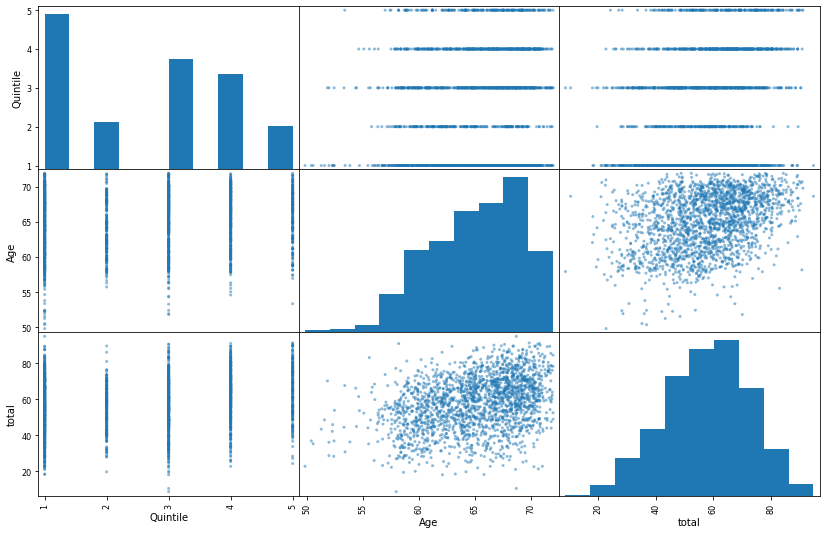

In [9]:
df_mainQ = dfClean[['Quintile', 'Age', 'total']]
df_corr = df_mainQ.copy()
df_mainQ.corr()
pd.plotting.scatter_matrix(df_mainQ, figsize=(14,9))
plt.show()

Certain variables are one-hot encoded to allow them to be interpreted in a model.

In [10]:
district = pd.get_dummies(dfClean.District, prefix='District') # apply one-hot encoding to the 'District' variable
grant = pd.get_dummies(dfClean.ChildSupportGrant, prefix='ChildSupportGrant') # apply one-hot encoding to the 'ChildSupportGrant' variable
df_mainQ = pd.concat([df_mainQ,district],axis=1)
df_mainQ = pd.concat([df_mainQ,grant],axis=1)
display(df_mainQ)

,Quintile,Age,total,District_mthata,District_libode,District_umgungundlovu,District_ilembe,District_madibeng,District_rustenburg,District_overberg,District_cape winelands,ChildSupportGrant_Yes,ChildSupportGrant_No,ChildSupportGrant_Do Not Know
0,3,59.311474,34.860001,1,0,0,0,0,0,0,0,1,0,0
1,3,58.950821,43.740002,1,0,0,0,0,0,0,0,1,0,0
2,3,58.688526,28.400000,1,0,0,0,0,0,0,0,1,0,0
3,3,58.491802,34.049999,1,0,0,0,0,0,0,0,1,0,0
4,3,57.934425,8.600000,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,1,61.278690,72.580002,0,0,0,1,0,0,0,0,1,0,0
2051,1,61.147541,48.290001,0,0,0,1,0,0,0,0,1,0,0
2052,1,60.327869,40.650002,0,0,0,1,0,0,0,0,1,0,0
2053,1,60.262295,38.470001,0,0,0,1,0,0,0,0,1,0,0


The following dataframe focuses on various behavioural aspects of the learners. We examine the correlations between these factors and the total ELOM score.

In [11]:
df_behaviour = dfClean[['ChildObs', 'SelfCare', 'SocialRelations', 'EmotionalReadiness', 'total']]
display(df_behaviour.corr())
df_behaviour_stats = pd.DataFrame({'Mean': df_behaviour.mean(), 'Std': df_behaviour.std()})
display(df_behaviour_stats)

,ChildObs,SelfCare,SocialRelations,EmotionalReadiness,total
ChildObs,1.000000,0.144763,0.282119,0.383548,0.581320
SelfCare,0.144763,1.000000,0.212451,0.224424,0.189644
SocialRelations,0.282119,0.212451,1.000000,0.598983,0.271454
EmotionalReadiness,0.383548,0.224424,0.598983,1.000000,0.459545
total,0.581320,0.189644,0.271454,0.459545,1.000000


,Mean,Std
ChildObs,7.172263,3.177714
SelfCare,3.714842,0.598968
SocialRelations,17.745012,3.755450
EmotionalReadiness,8.243796,2.969404
total,57.824092,14.530255


Below is a visualisation of the relationship between the Child Observation fields and the ELOM score.

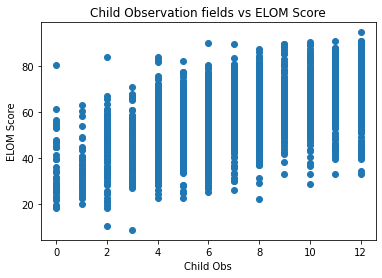

In [12]:
plt.scatter(dfClean.ChildObs,dfClean.total)
plt.title("Child Observation fields vs ELOM Score")
plt.xlabel('Child Obs')
plt.ylabel('ELOM Score')
plt.show()

The figure below displays the distribution of the ELOM score of the learners, per Quintile. We used the probability density function which allows us to make comparisons between the distributions as they are of different sizes.

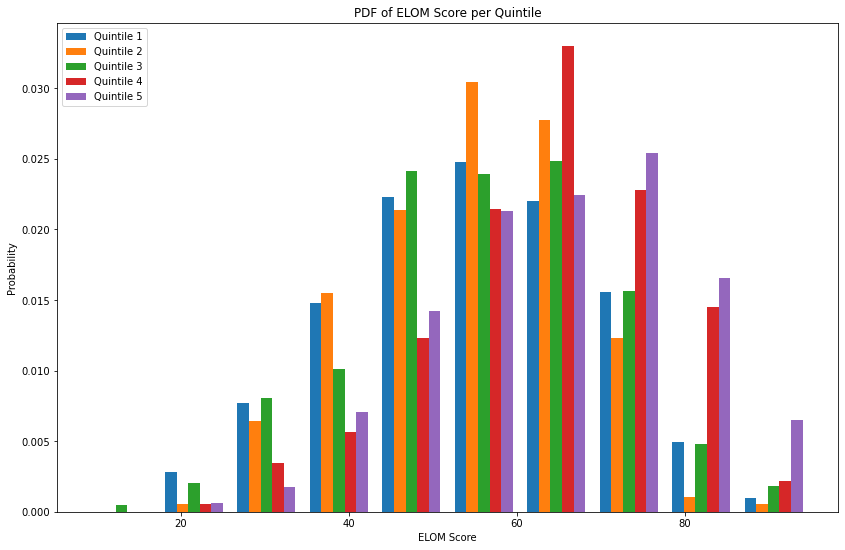

In [13]:
plt.figure(figsize=(14,9))
plt.hist([df_corr.total[df_corr.Quintile==1], df_corr.total[df_corr.Quintile==2], df_corr.total[df_corr.Quintile==3], df_corr.total[df_corr.Quintile==4], df_corr.total[df_corr.Quintile==5]], label=['Quintile 1', 'Quintile 2', 'Quintile 3', 'Quintile 4', 'Quintile 5'],density=True)
plt.legend(loc='upper left')
plt.title("PDF of ELOM Score per Quintile")
plt.xlabel('ELOM Score')
plt.ylabel('Probability')
plt.show()

Comparison of the mean ELOM Score per Quintile, for each age group.

In [14]:
dfAgeGroup1 = dfClean[dfClean.AgeGroup == '50 to 59']
dfAgeGroup2 = dfClean[dfClean.AgeGroup == '60 to 69']
dfAgeGroup3 = dfClean[dfClean.AgeGroup == '70 to 72']
df1 = pd.DataFrame(dfAgeGroup1.groupby('Quintile').agg({'total':['mean']}))
df2 = pd.DataFrame(dfAgeGroup2.groupby('Quintile').agg({'total':['mean']}))
df3 = pd.DataFrame(dfAgeGroup3.groupby('Quintile').agg({'total':['mean']}))
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Age 50 to 59 months')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Age 60 to 69 months')
df3_styler = df3.style.set_table_attributes("style='display:inline'").set_caption('Age 70 to 72 months')
space = "\xa0" * 10
display_html(df1_styler._repr_html_()+space+df2_styler._repr_html_()+space+df3_styler._repr_html_(), raw=True)

,total
,mean
Quintile,
1,45.778899
2,49.693421
3,46.400685
4,57.192500
5,59.052105
,total
,mean
Quintile,


The above analyses will assist in determining correlations between the chosen variables and provide futher insights into the data, which will in turn assist us in answering our sub-questions.